# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href="#one">1. Importing Packages</a>

<a href="#two">2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [126]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd # for data loading 
import numpy as np # for data manipilation 
import matplotlib.pyplot as plt # for data visualisation
from matplotlib import rc
import seaborn as sns
import statsmodels.formula.api as sm

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
train_df = pd.read_csv('utils/data/df_train.csv') # load the data
test_df = pd.read_csv('utils/data/df_test.csv') # load the data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [17]:
# look at data statistics
print(
    """ Dataset shape: \t {} \n
Dataset Description:\n {}
Dataset Nan values: \n {}
    """
    .format(train_df.shape, train_df.describe(),train_df.isna().sum()) 
)
# df.head() # at first glance suggestion... get a indexing column using the city name 

 Dataset shape: 	 (8763, 49) 

Dataset Description:
         Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.55

In [18]:
train_df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

### Analyzing based on Weather Attributes

In [21]:
weather_attributes = {
    'wind_speed': ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed'],
    'wind_deg': ['Madrid_wind_deg', 'Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg', 'Seville_wind_deg'],
    'clouds_all': ['Madrid_clouds_all', 'Valencia_clouds_all', 'Bilbao_clouds_all', 'Barcelona_clouds_all', 'Seville_clouds_all'],
    'pressure': ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Barcelona_pressure', 'Seville_pressure'],
    'rain_3h': ['Madrid_rain_3h', 'Valencia_rain_3h', 'Bilbao_rain_3h', 'Barcelona_rain_3h', 'Seville_rain_3h'],
    'weather_id': ['Madrid_weather_id', 'Valencia_weather_id', 'Bilbao_weather_id', 'Barcelona_weather_id', 'Seville_weather_id'],
    'temp_min': ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Barcelona_temp_min', 'Seville_temp_min'],
    'temp_max': ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Barcelona_temp_max', 'Seville_temp_max'],
    'snow_3h': ['Madrid_snow_3h', 'Valencia_snow_3h', 'Bilbao_snow_3h', 'Barcelona_snow_3h', 'Seville_snow_3h'],
    'temp': ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Barcelona_temp', 'Seville_temp'],
    'rain_1h': ['Madrid_rain_1h', 'Valencia_rain_1h', 'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h'],
    'humidity': ['Madrid_humidity', 'Valencia_humidity', 'Bilbao_humidity', 'Barcelona_humidity', 'Seville_humidity'],
}

In [210]:
#Identify Missing Weather Attribute Columns 
# train_df[[ i for i in weather_attributes['clouds_all']]]
missing_col = {}
all_cols = []
for key in weather_attributes.keys():
    for attribute in weather_attributes[key]:
        all_cols.append(attribute)
        if attribute not in train_df.columns:
            if key not in missing_col.keys():
                missing_col[key] = []
            missing_col[key].append(attribute)
      
print(missing_col)

{'wind_deg': ['Madrid_wind_deg', 'Seville_wind_deg'], 'clouds_all': ['Valencia_clouds_all', 'Barcelona_clouds_all'], 'rain_3h': ['Madrid_rain_3h', 'Valencia_rain_3h', 'Bilbao_rain_3h'], 'weather_id': ['Valencia_weather_id'], 'snow_3h': ['Madrid_snow_3h', 'Barcelona_snow_3h', 'Seville_snow_3h'], 'rain_1h': ['Valencia_rain_1h'], 'humidity': ['Bilbao_humidity', 'Barcelona_humidity']}


In [1]:
#Create separate DataFrames based on weather attributes
clouds_all_df = train_df[[i for i in train_df.columns if i[-3:] == 'all']]
humidity_df = train_df[[i for i in train_df.columns if i[-3:] == 'ity']]
pressure_df = train_df[[i for i in train_df.columns if i[-3:] == 'ure']]
rain_1h_df = train_df[[i for i in train_df.columns if i[-3:] == '_1h']]
rain_3h_df = train_df[[i for i in train_df.columns if i[-3:] == '_3h']]
snow_3h_df = train_df[[i for i in train_df.columns if i[-4:] == 'w_3h']]
temp_df = train_df[[i for i in train_df.columns if i[-3:] == 'emp']]
temp_max_df = train_df[[i for i in train_df.columns if i[-3:] == 'max']]
temp_min_df = train_df[[i for i in train_df.columns if i[-3:] == 'min']]
weather_id_df = train_df[[i for i in train_df.columns if i[-3:] == '_id']]
wind_speed_df = train_df[[i for i in train_df.columns if i[-3:] == 'eed']]
wind_deg_df = train_df[[i for i in train_df.columns if i[-3:] == 'deg']]

weather_tables = [clouds_all_df,humidity_df,pressure_df,rain_1h_df,rain_3h_df,snow_3h_df,temp_df,temp_max_df,temp_min_df,weather_id_df,wind_deg_df,wind_speed_df]

NameError: name 'train_df' is not defined

In [213]:
train_df['Unnamed: 0'].value_counts()

0       1
5844    1
5838    1
5839    1
5840    1
       ..
2915    1
2914    1
2913    1
2912    1
8762    1
Name: Unnamed: 0, Length: 8763, dtype: int64

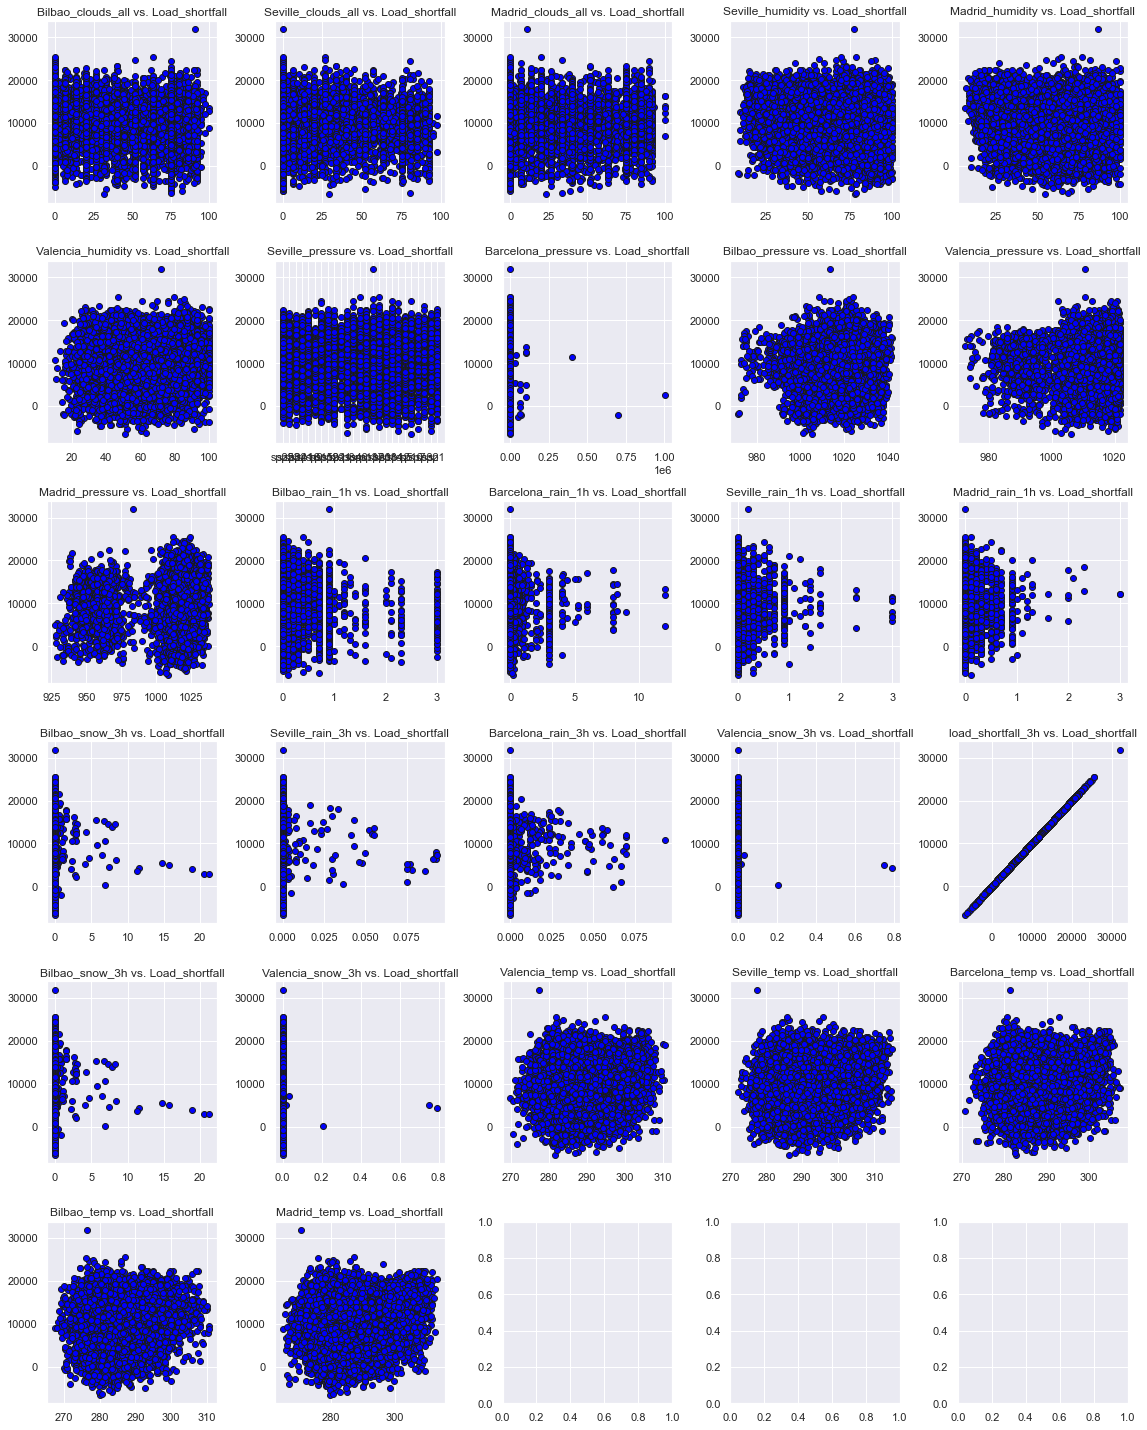

In [156]:
#Scatter Plots to understand correlation 
fig, axs = plt.subplots(6,5, figsize=(16,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
i = 0
for table in weather_tables[:7]:
    axs = axs.ravel()
    for index, column in enumerate(table.columns) :
        axs[i].set_title("{} vs. Load_shortfall".format(column),fontsize=12)
        axs[i].scatter(x=table[column],y=train_df['load_shortfall_3h'],color='blue',edgecolor='k')
        i += 1
    fig.tight_layout(pad=1)
    # fig.show()


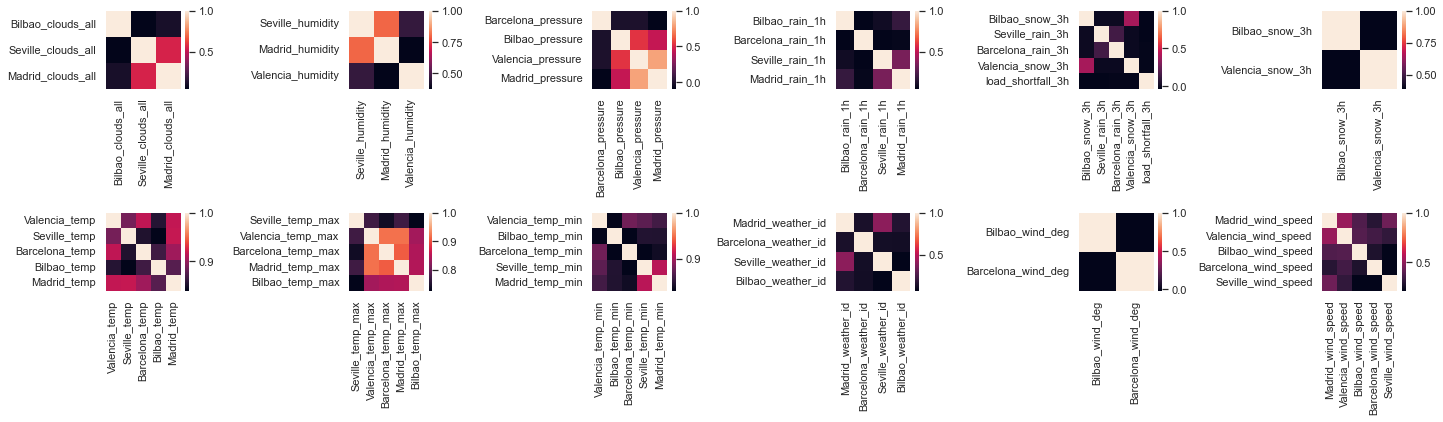

In [160]:
# g= sns.pairplot(wind_deg_df)
# g.fig.set_size_inches(9,9)
sns.set(font_scale=1)
# ax = sns.heatmap(temp_df.corr())

fig, axs = plt.subplots(2,6, figsize=(20,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
i = 0

    # for index, column in enumerate(table.columns) :
        # axs[index-1].set_title("{} vs. Load_shortfall".format(column),fontsize=12)
for table in weather_tables:
    sns.heatmap(table.corr(), ax = axs[i])
    i += 1

    # fig.set_ylabel(fontsize = 6)
fig.tight_layout(pad=1)


#### To find columns with high correlation

In [171]:
def find_correlation(data, threshold=0.7, remove_negative=False):
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][(corr_mat[col] > threshold) | (corr_mat[col] < -threshold)].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat


remove_cols = find_correlation(train_df)

In [172]:
remove_cols

['Seville_temp',
 'Madrid_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Seville_humidity',
 'Madrid_rain_1h',
 'Valencia_pressure',
 'Valencia_temp',
 'Seville_temp',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Seville_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'Valencia_temp_min']

In [175]:
train_df_red = train_df.drop(columns=[i for i in remove_cols])

train_df_red.shape

(8763, 32)

In [168]:
formula_str = train_df.columns[-1] + ' ~ ' + '+'.join(i for i in rain_3h_df.columns if i != 'load_shortfall_3h')

# model = sm.ols(formula=formula_str, data = rain_3h_df.assign(load_shortfall_3h = train_df['load_shortfall_3h']))
# fitted = model.fit()
# print(fitted.summary())
print(rain_3h_df.columns)

Index(['Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'load_shortfall_3h'],
      dtype='object')


In [50]:
train_df[[i for i in train_df.columns if i[-3:] == '_id']]

,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id
0,800.000000,800.0,800.000000,800.000000
1,800.000000,800.0,800.000000,800.000000
2,800.000000,800.0,800.000000,800.000000
3,800.000000,800.0,800.000000,800.000000
4,800.000000,800.0,800.000000,800.000000
...,...,...,...,...
8758,727.666667,801.0,769.333333,802.333333
8759,762.000000,801.0,803.000000,801.333333
8760,702.333333,801.0,801.666667,601.000000
8761,500.000000,800.0,802.333333,634.166667


In [23]:
df_copy

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
0,0.666667,0.666667,1.000000,6.333333,3.333333
1,0.333333,1.666667,1.000000,4.000000,3.333333
2,1.000000,1.000000,1.000000,2.000000,2.666667
3,1.000000,1.000000,1.000000,2.333333,4.000000
4,1.000000,1.000000,0.333333,4.333333,3.000000
...,...,...,...,...,...
8758,1.000000,2.666667,4.333333,1.666667,1.000000
8759,5.000000,2.000000,8.000000,3.000000,1.666667
8760,6.333333,7.333333,8.333333,5.333333,3.666667
8761,7.333333,7.333333,2.666667,5.333333,4.333333


In [6]:
copy_df = df.fillna(0) #replaced missing values with 0


In [19]:
copy_df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [7]:
copy_df = copy_df.drop(['Unnamed: 0'], axis=1) # removed column because it was not telling us anything 
copy_df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [8]:
pd.set_option('display.max_columns', copy_df.shape[0]+1) #If we want to see more...

A few observations our columns are redundant

Measurements are not of equal unit e.g wind_deg and pressure

Is the time column really import for us?

In [11]:
copy_df.tail()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,83.666667,45.000000,1.000000,0.0,sp23,0.0,0.0,1021.000000,0.0,0.0,0.0,0.0,727.666667,801.0,1017.666667,769.333333,0.000000,285.483333,1024.000000,282.483333,282.483333,802.333333,285.076667,71.333333,282.483333,282.150000,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,213.333333,85.000000,1.666667,0.0,sp23,0.0,0.0,1019.000000,0.0,0.0,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.000000,288.483333,1023.666667,291.816667,291.816667,801.333333,287.673333,40.333333,291.816667,287.816667,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,256.666667,85.000000,3.666667,0.0,sp22,0.0,0.0,1015.666667,0.0,0.1,0.0,0.0,702.333333,801.0,1017.333333,801.666667,1009.666667,291.483333,1021.666667,290.706333,290.706333,601.000000,290.070000,44.666667,290.706333,290.483333,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,5.333333,250.000000,56.666667,4.333333,0.0,sp23,0.0,0.0,1015.000000,0.0,0.3,0.0,0.0,500.000000,800.0,1020.333333,802.333333,1020.000000,291.483333,1023.000000,290.483333,290.483333,634.166667,290.070000,45.000000,290.483333,288.150000,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,33.333333,156.666667,4.333333,253.333333,0.000000,1.666667,0.0,sp25,0.0,0.0,1016.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1023.666667,801.666667,0.000000,289.150000,1027.333333,289.483333,289.483333,801.000000,288.140000,50.000000,289.483333,287.816667,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [44]:
pd.set_option('display.max_columns', 10) #Reverting back to the default
copy_df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,...,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,...,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,...,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,...,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,...,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,...,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,...,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,...,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,...,284.150000,289.150000,282.666667,280.816667,-760.000000


In [189]:
# print(copy_df.dtypes)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [31]:
copy_df['Madrid_rain_1h'].value_counts()

0.00    7835
0.30     266
0.10     244
0.20     150
0.90      63
        ... 
2.30       2
0.15       2
1.60       2
3.00       2
2.10       1
Name: Madrid_rain_1h, Length: 19, dtype: int64

In [29]:
copy_df['Seville_pressure'].value_counts() #checking presure options 

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
       ... 
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, Length: 25, dtype: int64

In [32]:
copy_df.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [56]:
valencia_df = copy_df[[
                        # 'Valencia_wind_deg', 
                        # 'Barcelona_wind_deg', 
                        # 'Madrid_wind_deg', 
                        # 'Valencia_wind_speed',
                        # 'Valencia_snow_3h',
                        'Valencia_pressure',
                        # 'Valencia_temp',
                        # 'Valencia_humidity',
                        'load_shortfall_3h']]

In [39]:
valencia_df.head()

,Valencia_wind_speed,Valencia_temp,load_shortfall_3h
0,0.666667,269.888000,6715.666667
1,1.666667,271.728333,4171.666667
2,1.000000,278.008667,4274.666667
3,1.000000,284.899552,5075.666667
4,1.000000,283.015115,6620.666667


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

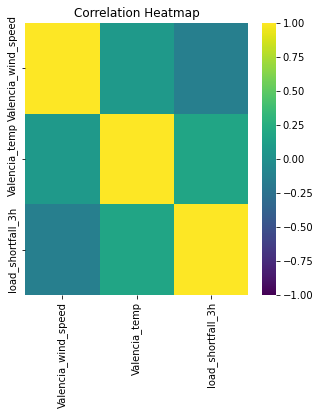

In [43]:
fig, ax = plt.subplots(figsize = (5,5))
heatmap = sns.heatmap(valencia_df.corr(),ax=ax, vmin=-1, vmax=1, annot=False, cmap="viridis")
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

In [57]:
from statsmodels.formula.api import ols

#model dataframe with all columns 
dfm = valencia_df.copy()

#the dependent variable 
y_shortfall = 'load_shortfall_3h'

#the independent variables
x_names = [col for col in dfm.columns if col!= 'load_shortfall_3h']

#build OLS formula string
formula_str = y_shortfall + " ~ " + " + ".join(x_names)
print ("Formula:\n\t {}".format(formula_str))


Formula:
	 load_shortfall_3h ~ Valencia_pressure


In [58]:
#fit the model using the model dataframe
model = ols(formula = formula_str, data = dfm)
fitted = model.fit()

#output the printed summary
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     30.92
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.77e-08
Time:                        11:26:43   Log-Likelihood:                -87428.
No. Observations:                8763   AIC:                         1.749e+05
Df Residuals:                    8761   BIC:                         1.749e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.123e+04    114.53

In [208]:
train_df[train_df['load_shortfall_3h'] == 31904]
# df['Valencia_wind_deg_slice'] = df ['Valencia_wind_deg'].str.slice(6)
# copy_df.describe()
# train_df['load_shortfall_3h'].value_counts(sort = True)
copy_df = train_df.copy()

copy_df = copy_df.drop(148)

copy_df[copy_df['load_shortfall_3h'] == 31904]

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h


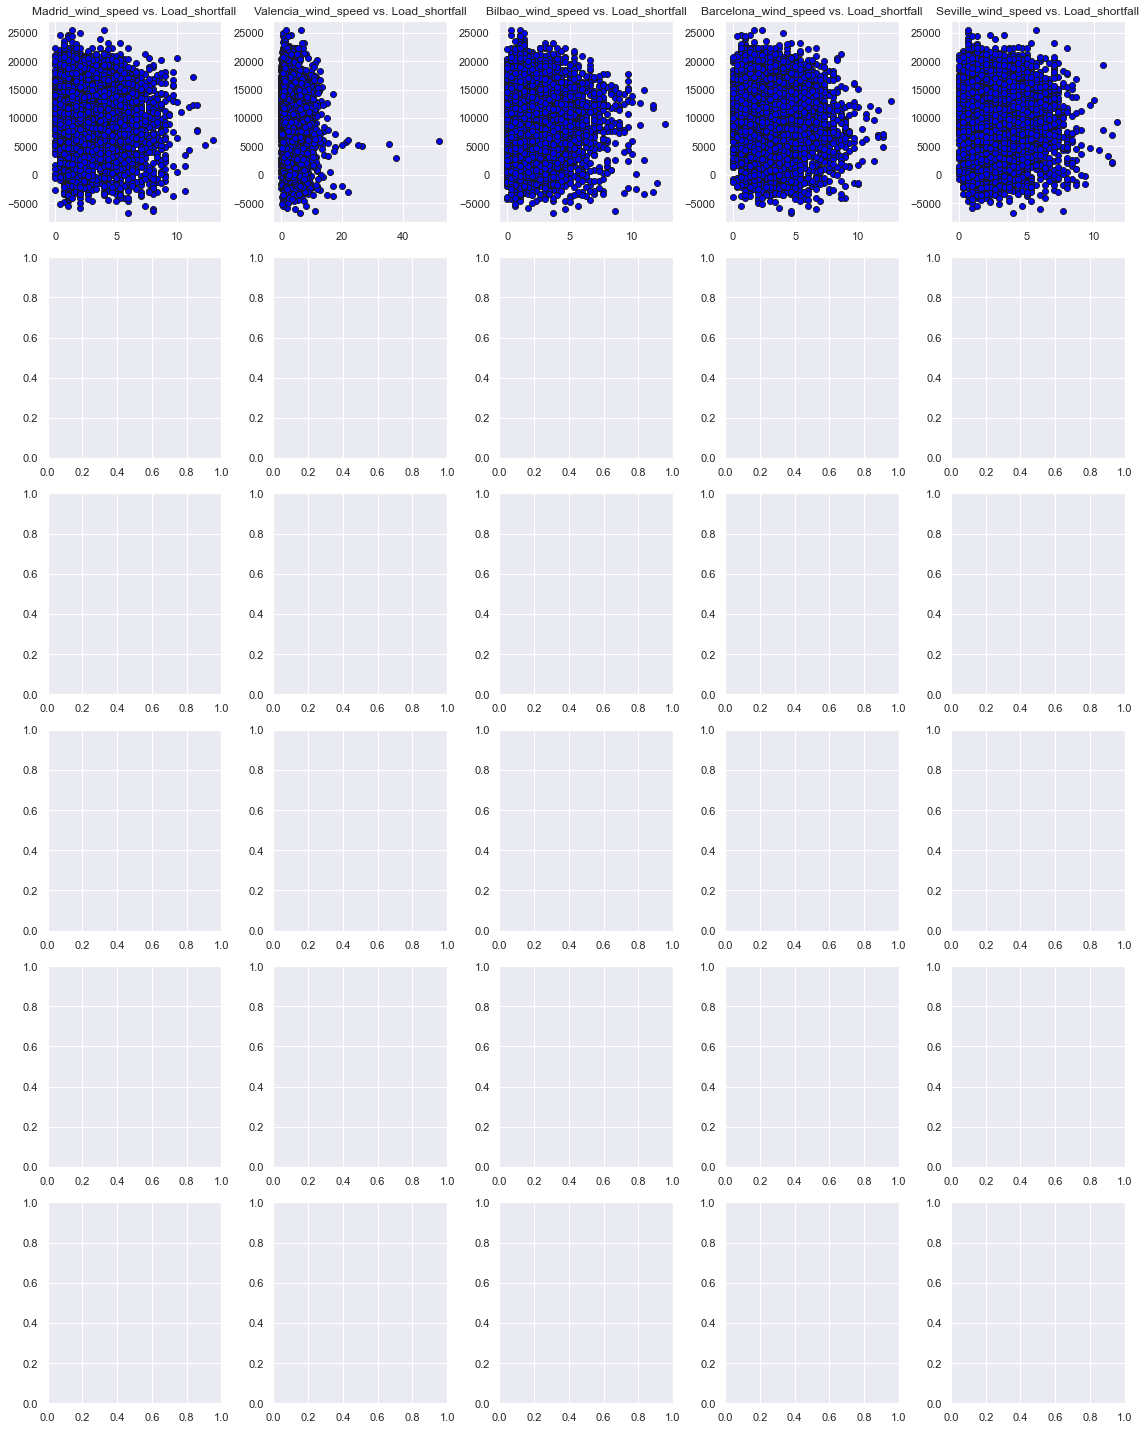

In [209]:
fig, axs = plt.subplots(6,5, figsize=(16,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
i = 0
# for table in weather_tables[:7]:
axs = axs.ravel()
for index, column in enumerate(table.columns) :
    axs[i].set_title("{} vs. Load_shortfall".format(column),fontsize=12)
    axs[i].scatter(x=copy_df[column],y=copy_df['load_shortfall_3h'],color='blue',edgecolor='k')
    i += 1
fig.tight_layout(pad=1)

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic